In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from pathlib import Path
from rdkit import Chem
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from glob import glob

In [ ]:
len(glob("xyz_files/**/*.xyz"))

2338891

In [ ]:
import requests
import tarfile

from io import BytesIO


def extract_tarball(url, output_dir):
    # Download the tarball from the URL
    response = requests.get(url)
    if response.status_code != 200:
        raise ValueError(f"Failed to download tarball from {url}")

    # Extract the contents of the tarball to the output directory
    with tarfile.open(fileobj=BytesIO(response.content), mode="r|gz") as tar:
        tar.extractall(output_dir)

In [ ]:
extract_tarball("https://figshare.com/ndownloader/files/28672248", "labels")

KeyboardInterrupt: 

In [ ]:
from chemnlp.utils import load_config

In [ ]:
config = load_config(
    "/Users/kevinmaikjablonka/git/openbioml/chemnlp/data/orbnet_denali/orbnet_denali_structures/meta.yaml"
)

In [ ]:
list(filter(lambda x: x["description"] == "structure download", config["links"]))

[{'url': 'https://figshare.com/ndownloader/files/28672287',
  'description': 'structure download'}]

extracts to `labels/denali_labels.csv`

In [ ]:
df = pd.read_csv("labels/denali_labels.csv")

In [ ]:
df.head()

,Unnamed: 0,sample_id,subset,mol_id,test_set,test_set_plus,prelim_1,training_set_plus,charge,dft_energy,xtb1_energy
0,0,afbf243cac422109c201692497d1a5f5ca718db9df5e46...,protomers,CHEMBL10003_protomer_1,False,False,False,True,1,-1175.708425,-60.664158
1,1,d432f51ec9b41228d9f4a0be666e8619ce573ab5546461...,protomers,CHEMBL10003_protomer_1,False,False,False,True,1,-1175.568215,-60.539050
2,2,589a3ea1ed9e8d8ff1a2a21a91cda29d07afb37980e329...,protomers,CHEMBL10003_protomer_1,False,False,False,True,1,-1175.598378,-60.567965
3,3,8f0884b6a07ce6f472fdbb7dd63980f6823297c1db2bd8...,protomers,CHEMBL10003_protomer_1,False,False,False,True,1,-1175.610295,-60.580380
4,4,b66f4a8e89b4a0ac0d9763ce2c971c3c7a9a5408d0b776...,protomers,CHEMBL10003_protomer_1,False,False,False,True,1,-1175.659620,-60.622829


In [ ]:
len(df)

2344594

In [ ]:
from glob import glob

In [ ]:
len(glob("/Users/kevinmaikjablonka/Downloads/xyz_files/**/*.xyz"))

In [ ]:
df["subset"].unique()

array(['protomers', 'qm7bprotomers', 'saltcomplex', 'small', 'conformers',
       'jsch', 'ssi'], dtype=object)

In [ ]:
len(df[df["subset"] == "ssi"]) / len(df)

0.005750249296893194

In [ ]:
protomer_subset = df[(df["subset"] == "protomers") | (df["subset"] == "qm7bprotomers")]

In [ ]:
len(protomer_subset) / len(df)

0.09206967176406662

 the paths to structures is something like xyz_files/mol_id/sample_id

In [ ]:
mol = Chem.MolFromXYZFile(
    "/Users/kevinmaikjablonka/Downloads/xyz_files/CHEMBL10003_protomer_1/8ce922b35ecfcab2d4d5a5483424dcdbfc005711ae5294a97d59268dd3b77c81.xyz"
)

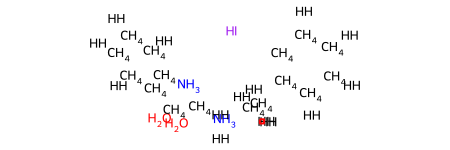

In [ ]:
mol.coo

In [ ]:
from rdkit.Chem import rdDetermineBonds
from chemnlp.utils import xyz_to_mol

In [ ]:
mol = xyz_to_mol(
    "/Users/kevinmaikjablonka/Downloads/xyz_files/CHEMBL10003_protomer_1/8ce922b35ecfcab2d4d5a5483424dcdbfc005711ae5294a97d59268dd3b77c81.xyz",
    1,
    True,
)

In [ ]:
conf = mol.GetConformer()

In [ ]:
pos = conf.GetAtomPosition(0)

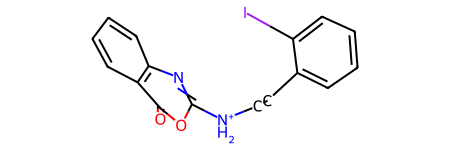

In [ ]:
mol

In [ ]:
pos.x

-2.423494526704

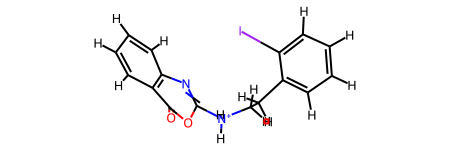

In [ ]:
mol

In [ ]:
Chem.MolToSmiles(mol)

'O=c1oc([NH2+]CCc2ccccc2I)nc2ccccc12'

In [ ]:
len(df)

NameError: name 'df' is not defined